<h1><center> Backpropagation </center></h1>

<h3><center> Algoritam učenja iza neuronskih mreža </center></h3>

Sadržaj notebooka:

1. [Uvod u neuronske mreže](#intro)  - Kratki pregled što su neuronske mreže i kako rade. <br>
    1.1 [Motivacija](#motiv) <br>
    1.2 [Perceptroni](#perc) <br>
    1.3 [Neuroni](#neuron) <br>
    1.4 [Neuronske mreže](#nn) <br>
2. [Učenje kroz prošlost](#past)  - Kako su neuronske mreže učile kroz prošlost? <br>
3. [Backpropagation](#backprop)     - "Moderni" pristup učenju neuronskih mreža <br>
4. [Zaključak](#conclusion)          - Prednosti i mane backpropagationa i što dalje? <br>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from IPython.display import Image

### Uvod u neuronske mreže <a name="intro"></a>


#### Motivacija <a name="motiv"></a>

<p>U konvencionalnom pristupu programiranju, ljudi su "govorili" računalu što da radi tako što su razbijali velike probleme na mnogo manjih, precizno definiranih problema koje je računalo moglo lako izvršavati.</p>
<p>Neuronske mreže zauzimaju potpuno suprotni pristup načinu na koji smo dosada programirali. U neuronskim mrežama mi ne kažemo računalu kako da riješi naš problem. Umjesto toga, neuronske mreže uče promatrajući velike količine podataka, samostalno smišljajući rješenje predstavljenog problema.</p>

<p> Kako bi dobili predodžbu koliko su neuronske mreže inovativne zamislimo problem prepoznavanja znamenki. Prepoznavanje znamenki ne bi trebao biti lagan problem, ali mi ljudi smo izuzetno dobri u tome i često ne cijenimo koliko teške probleme naš mozak rješava na dnevnoj bazi. </p>

<p> Tek nakon što pokušamo napisati program koji prepoznaje znamenke, postanemo svjesni problema - ono što nam se dosada činilo izuzetno laganim, odjednom postaje jako težak problem. Jednostavna intuicija iza toga kako mi prepoznajemo znamenke poput "6 se sastoji od kružića i ravne crte iz donjeg lijevod u gornji desni kut" je ne baš jednostavna za izraziti algoritamski. Čak i ako pokušamo jasno definirati pravila, izgubiti ćemo se u moru specijalnih slučajeva. </p>

<p> Neuronske mreže uzimaju potpuno drukčiji pristup, nešto nalik tome kako smo mi učili brojeve. Ideja je da uzmemo veliku količinu napisaih brojeva i razvijemo sistem koji će učiti iz tih znamenki, odnosno sistem koji će sam definirati pravila kako raspoznati koja je koja znamenka. </p>

#### Perceptroni - prethodnik neurona <a name="perc"></a>

<p>Da bi razumjeli što je neuronska mreža, prvo moramo razumjeti što je neuron. </p>

<p>Prvo ćemo promotriti model <em>perceptrona</em>. Perceptron prima nekoliko binarnih vrijednosti $x_1$, $x_2$,..., $x_n$ i daje binarni rezultat tako što svakom ulaznom podatku $x_i$ daje "važnost" $\omega_i$. Tu "važnost" $\omega_i$ zvati ćemo težina. Rezultat, 0 ili 1, koji perceptron daje ovisi isključivo o tome je li $\sum \omega_i \cdot x_i$ veća ili manja od nekog praga. </p>

![title](images/perceptron.png)

<p>Ako zapišemo $x_i$ i $\omega_i$ kao vektore $x$ i $\omega$, te uvedemo bias $b=-$prag dobijemo sljedeći rezultat. </p>

$$
\text{perceptron(x)} = \left\{
    \begin{array} \\
        0, & \ \omega \cdot x + b\leq 0 \\
        1, & \ \omega \cdot x + b > 0 \\
    \end{array}
\right.
$$

<p> Stoga perceptron možemo promatrati kao model koji daje težinu nekim tvrdnjama i iz njih donosi zaključak. </p>

Sada, ono što želimo postići je međusobno povezati te perceptrone i onda promjenama u težinama i biasu natjerati mrežu da uči. Kako bi mreža učila, ono što moramo postići je da kada napravimo malu promjenu na težini ili na biasu dobijemo i malu promjenu na izlazu mreže. Međutim, problem kod perceptrona je što mala promjena na težinama i biasu može uzrokovati potpunu promjenu na izlazu. 

Zašto je to problem? Pretpostavimo da naša mreža dobro klasificira većinu brojeva, ali klasificira sliku broja kao 1 umjesto 7. Ako bi se malom promjenom na težinama dobivala mala promjena na izlazu, onda bi polako mogli natjerati naš program da klasificira tu sliku kao 7, minimalno utječući na to kako mreža reagira na ostale slike. Međutim ako je mreža napravljena od perceptrona, mala promjena koja će natjerati sliku da pokazuje na 7 usput će možda promijeniti i druge slike na potpuno nepredvidiv način.

#### Neuroni - osnovne gradivne jedinice <a name="neuron"></a>

<p>U modelu perceptrona smo naišli na problem binarnog izlaza, odnosno perceptron kao izlaz vraća 0 ili 1. Kako bi rješili taj problem uvodimo aktivacijske funkcije i tako nastaju neuroni kakvi se i danas koriste. </p>

<p> Koja je svrha aktivacijske funkcije? Recimo da želimo postići da umjesto da naš neuron vraća samo 0 ili 1, on ima mogućnost vratiti i sve vrijednosti između. Time smo postigli da mala promjena u nekoj od težina ne uzrokuje veliki flip sa 0 na 1 ili obratno. Kako bi dobili takav model neurona primjenjujemo aktivacijsku funkciju na njegov izlaz. </p>

<p> Najčešće korištene aktivacijske funkcije su: </p>

\begin{align}
    f(x) &= \frac{1}{1 + e^{-x}}, \ \ \ \text{sigmoid funkcija} \\ \\
    f(x) &= tanh(x), \ \ \ \ \ \text{tangens hiperbolni} \\ \\
    f(x) &= max(0, x), \ \ \text{ReLu funkcija}
\end{align}

<br>

In [4]:
# Step funkcija koja se koristi u modelu perceptrona
def step(x):
    return np.heaviside(x, 1)

# Jednadžbe aktivacijskih funkcija koje se koriste u modelu neurona
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

def tanh(x):
    return np.tanh(x)

def ReLu(x):
    return np.maximum(0, x)

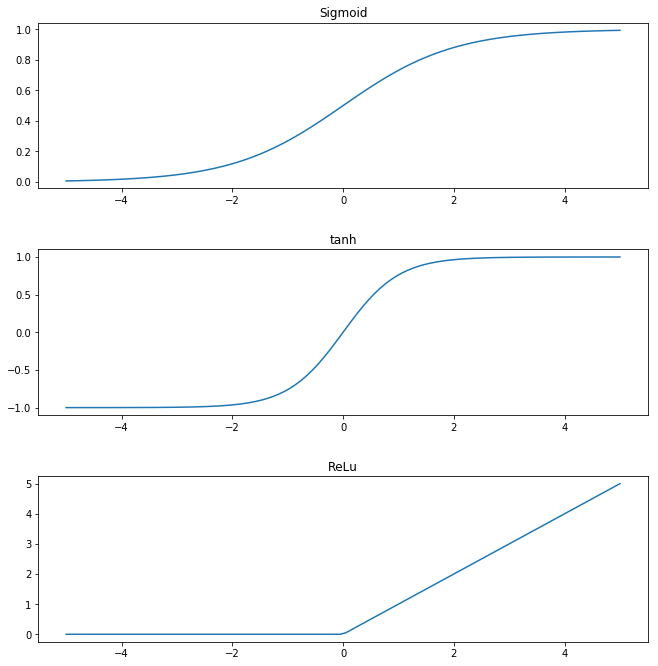

In [5]:
# Grafovi aktivacijskih funkcija
x = np.linspace(-5, 5, num = 100)

fig1, ax1 = plt.subplots(3, 1, figsize=(10, 10))
fig1.tight_layout(pad = 4.0)
ax1[0].plot(x, sigmoid(x))
ax1[0].set_title('Sigmoid')

ax1[1].plot(x, tanh(x))
ax1[1].set_title('tanh')

ax1[2].plot(x, ReLu(x))
ax1[2].set_title('ReLu')

plt.show()

<p> 
Uzmimo kao primjer sigmoid aktivacijsku funkciju i usporadimo je sa dosadašnjom step funkcijom primjenjenom na perceptronu:
</p>

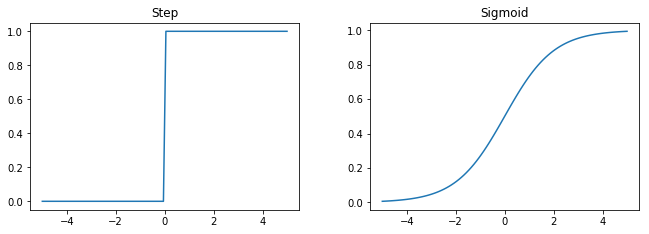

In [16]:
# Usporedba grafa sigmoid i step funkcija
x = np.linspace(-5, 5, num = 100)

fig2, ax2 = plt.subplots(1, 2, figsize=(10, 4))
fig2.tight_layout(pad = 4.0)

ax2[0].plot(x, step(x))
ax2[0].set_title('Step')

ax2[1].plot(x, sigmoid(x))
ax2[1].set_title('Sigmoid')

plt.show()

<p> Slično kao i perceptron, <em>sigmoid neuron</em> kao ulazne vrijednosti prima $x_1$, ..., $x_n$. Također, isto kao u perceptronu, neuron se sastoji od težina $\omega_i$ i biasa $b$. Međutim, izlaz neurona nije 0 ili 1, već prima vrima vrijednosti $\sigma(\omega \cdot x + b)$, gdje je $\sigma$ sigmoid funkcija. </p> 

$$ \sigma(z) = \frac{1}{1 + e^{-z}} = \frac{1}{1 + \text{exp}\big({-\sum{\omega_i \cdot x_i} - b}\big)}$$

<p>
Prvo primjetimo sličnost između step i sigmoid funkcije. Neka je $z = \omega \cdot x + b$. Ako je $z$ velik pozitivan broj, tada je $e^{-z} \approx 0$ odnosno $\sigma(z) \approx 1$, baš kao što bi očekivali da će biti za perceptron. Ako je $z$ velik negativan broj, tada $e^{-z} \to \infty$ odnosno $\sigma(z) \approx 0$, baš kao što bi očekivali da će biti za perceptron. Jedino kada $z$ poprima vrijednosti između očekujemo drukčije ponašanje.
</p>

<p>
Promatrajući sliku možemo zaključiti da je sigmoid zapravo samo izglađena step funkcija. Glatkoća sigmoid funkcije je od ključne važnosti. Diferencijalnim računom dolazimo do sljedećeg rezultat:
    $$ \Delta \text{izlaz} \approx \sum_i \frac{\partial \text{izlaz}}{\partial \omega_i}\Delta \omega_i + \frac{\partial \text{izlaz}}{\partial b} \Delta b $$
<br> Gornja jednadžba kaže da je $\Delta \text{izlaz}$ linearna funkcija u ovisnosti o $\Delta \omega_i$ i $\Delta b$. Svojstvo linearnosti garantira nam da ćemo malim promjenama na težinama i biasu postići male promjene i na izlazu, što je upravo ono što smo željeli postići.
</p>

<p>
Primjetimo da je od ključne važnosti sigmoid funkcije njena glatkoća, a ne oblik. To nas motivira na rad i sa drugim aktivacijskim funkcijama, a glavna promjena koja nastaje zamjenom aktivacijske funkcije je promjena parcijalne derivacije. Često ćemo tražiti aktivacijske funkcije (poput sigmoid funkcije) čije parcijalne derivacije imaju lijepa svojstva, odnosno pojednostavljuju račun. 
</p>

#### Neuronske mreže <a name="nn"></a>

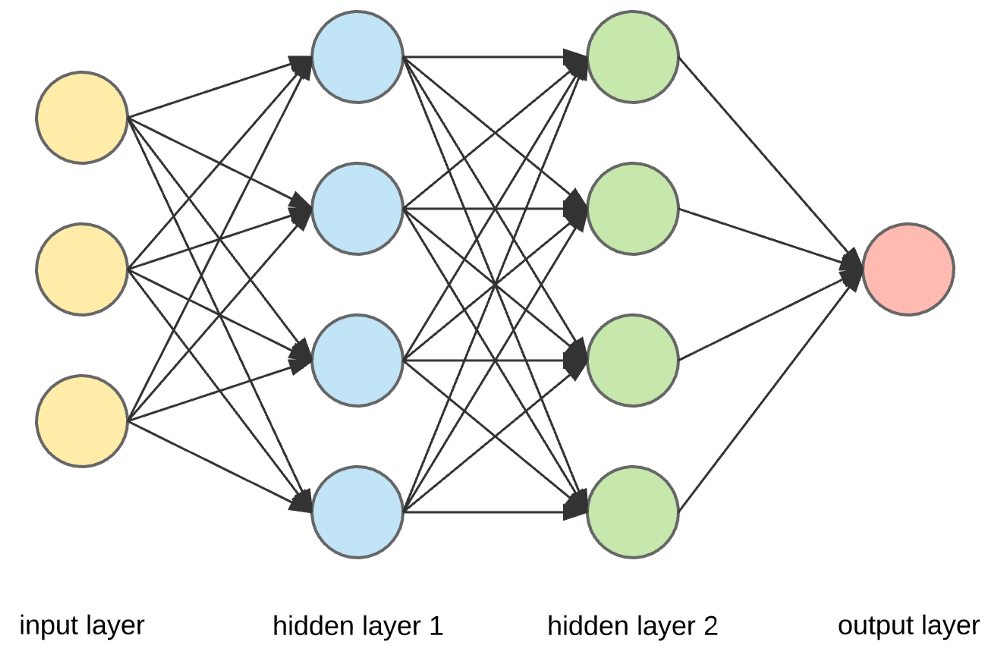

Primjer neuronske mreže.


In [29]:
try:
    display(Image(filename = "images/neuralnetwork.png"))
except:
    display(Image(url = "https://miro.medium.com/max/1318/1*3fA77_mLNiJTSgZFhYnU0Q.png"))
    
print("Primjer neuronske mreže.")

<p>
Promotrimo gornji primjer neuronske mreže. Takav model neuronske mreže je ujedno i najjednostavniji model - unaprijedna neuronska mreža. U unaprijednoj neuronskoj mreži podaci se kreću u jednom smjeru, unaprijed - od ulaza, preko skrivenih slojeva, do izlaza. Neuroni su povezani u slojeve, a svaki sloj ima određenbroj neurona koji je vidljivo odvojen od ostalih slojeva. Svaka neuronska mreža sastoji se od jednog ulaznog sloja (input layer), jednog izlaznog sloja (output layer) te jednog ili više skrivenih slojeva koji služe za obradu. Neuroni jednog sloja su pospojeni sa svim neuronima idućeg sloja preko poveznica (težina).
</p>

<p>
Gornji primjer sastoji se od ulaznog sloja sa tri neurona, dva skrivena sloja sa po četiri neurona te izlaznog sloja sa jednim neuronom.
</p>


### Učenje kroz prošlost <a name="past"></a>

### Backpropagation <a name="backprop"></a>


### Zaključak <a name="conclusion"></a>
